In [1]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [3]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [4]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [5]:
#import the WHOLE dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [6]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [7]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21616 non-null  int64  
 1   app_id                          21616 non-null  int64  
 2   app_name                        21616 non-null  object 
 3   review_id                       21616 non-null  int64  
 4   language                        21616 non-null  object 
 5   review                          21587 non-null  object 
 6   timestamp_created               21616 non-null  int64  
 7   timestamp_updated               21616 non-null  int64  
 8   recommended                     21616 non-null  bool   
 9   votes_helpful                   21616 non-null  int64  
 10  votes_funny                     21616 non-null  int64  
 11  weighted_vote_score             21616 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,1671,292030,The Witcher 3: Wild Hunt,84858656,english,It is literally just a perfect game the combat...,1610898940,1610898940,True,0,...,True,False,False,76561198150803107,2,1,3187.0,2729.0,3009.0,1.611154e+09
1,1949,292030,The Witcher 3: Wild Hunt,84810590,polish,super,1610829905,1610829905,True,0,...,True,False,False,76561198388577176,12,2,6087.0,605.0,5905.0,1.610996e+09
2,2069,292030,The Witcher 3: Wild Hunt,84791240,schinese,永远滴神！,1610807582,1610807582,True,0,...,True,False,False,76561198370106694,30,3,4783.0,0.0,4783.0,1.547435e+09
3,2436,292030,The Witcher 3: Wild Hunt,84727293,russian,Ведьмак топ за свои деньги,1610717336,1610717336,True,0,...,True,False,False,76561198155810458,9,1,2070.0,39.0,2053.0,1.610799e+09
4,4985,292030,The Witcher 3: Wild Hunt,84326113,koreana,꿀잼,1610153143,1610153143,True,0,...,True,False,False,76561198088951140,81,7,1297.0,0.0,1297.0,1.609586e+09


In [8]:
#df.duplicated() #Returns a boolean Series denoting duplicate rows
#index=0
#for i in df.duplicated():
#    if i==True: print(index, "is duplicated")
#    index+=1

In [9]:
df.memory_usage( )

Index                                128
Unnamed: 0                        172928
app_id                            172928
app_name                          172928
review_id                         172928
language                          172928
review                            172928
timestamp_created                 172928
timestamp_updated                 172928
recommended                        21616
votes_helpful                     172928
votes_funny                       172928
weighted_vote_score               172928
comment_count                     172928
steam_purchase                     21616
received_for_free                  21616
written_during_early_access        21616
author.steamid                    172928
author.num_games_owned            172928
author.num_reviews                172928
author.playtime_forever           172928
author.playtime_last_two_weeks    172928
author.playtime_at_review         172928
author.last_played                172928
dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            29
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         28
author.last_played                 0
dtype: int64

<AxesSubplot:>

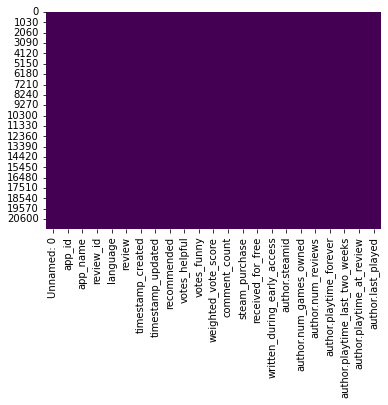

In [11]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

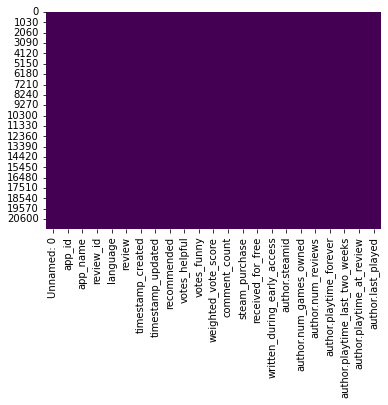

In [12]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

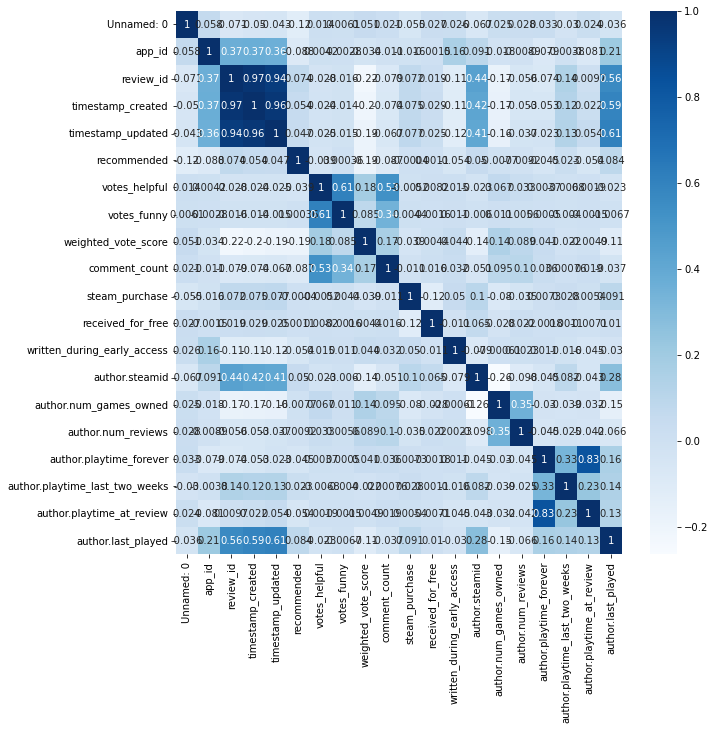

In [13]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

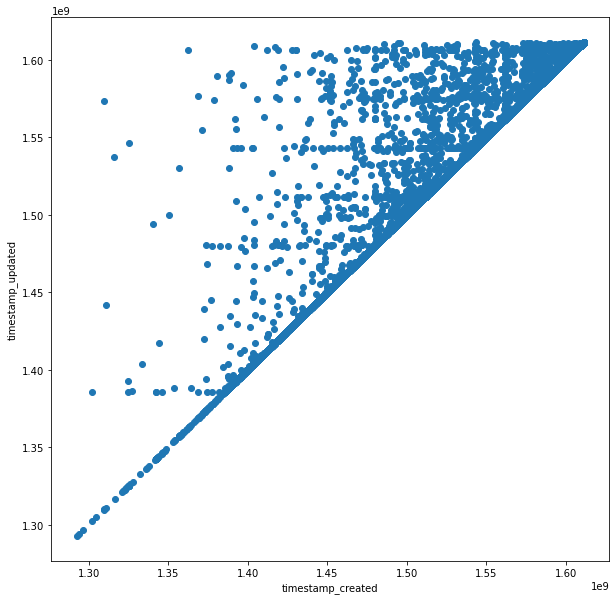

In [14]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [15]:
s=df["app_name"].value_counts()
percent=1/100*df.shape[0]
s=s.groupby(np.where(s>=percent,s.index,'other games')).sum()
s=s.sort_values(axis=0, ascending=False, ignore_index=False)

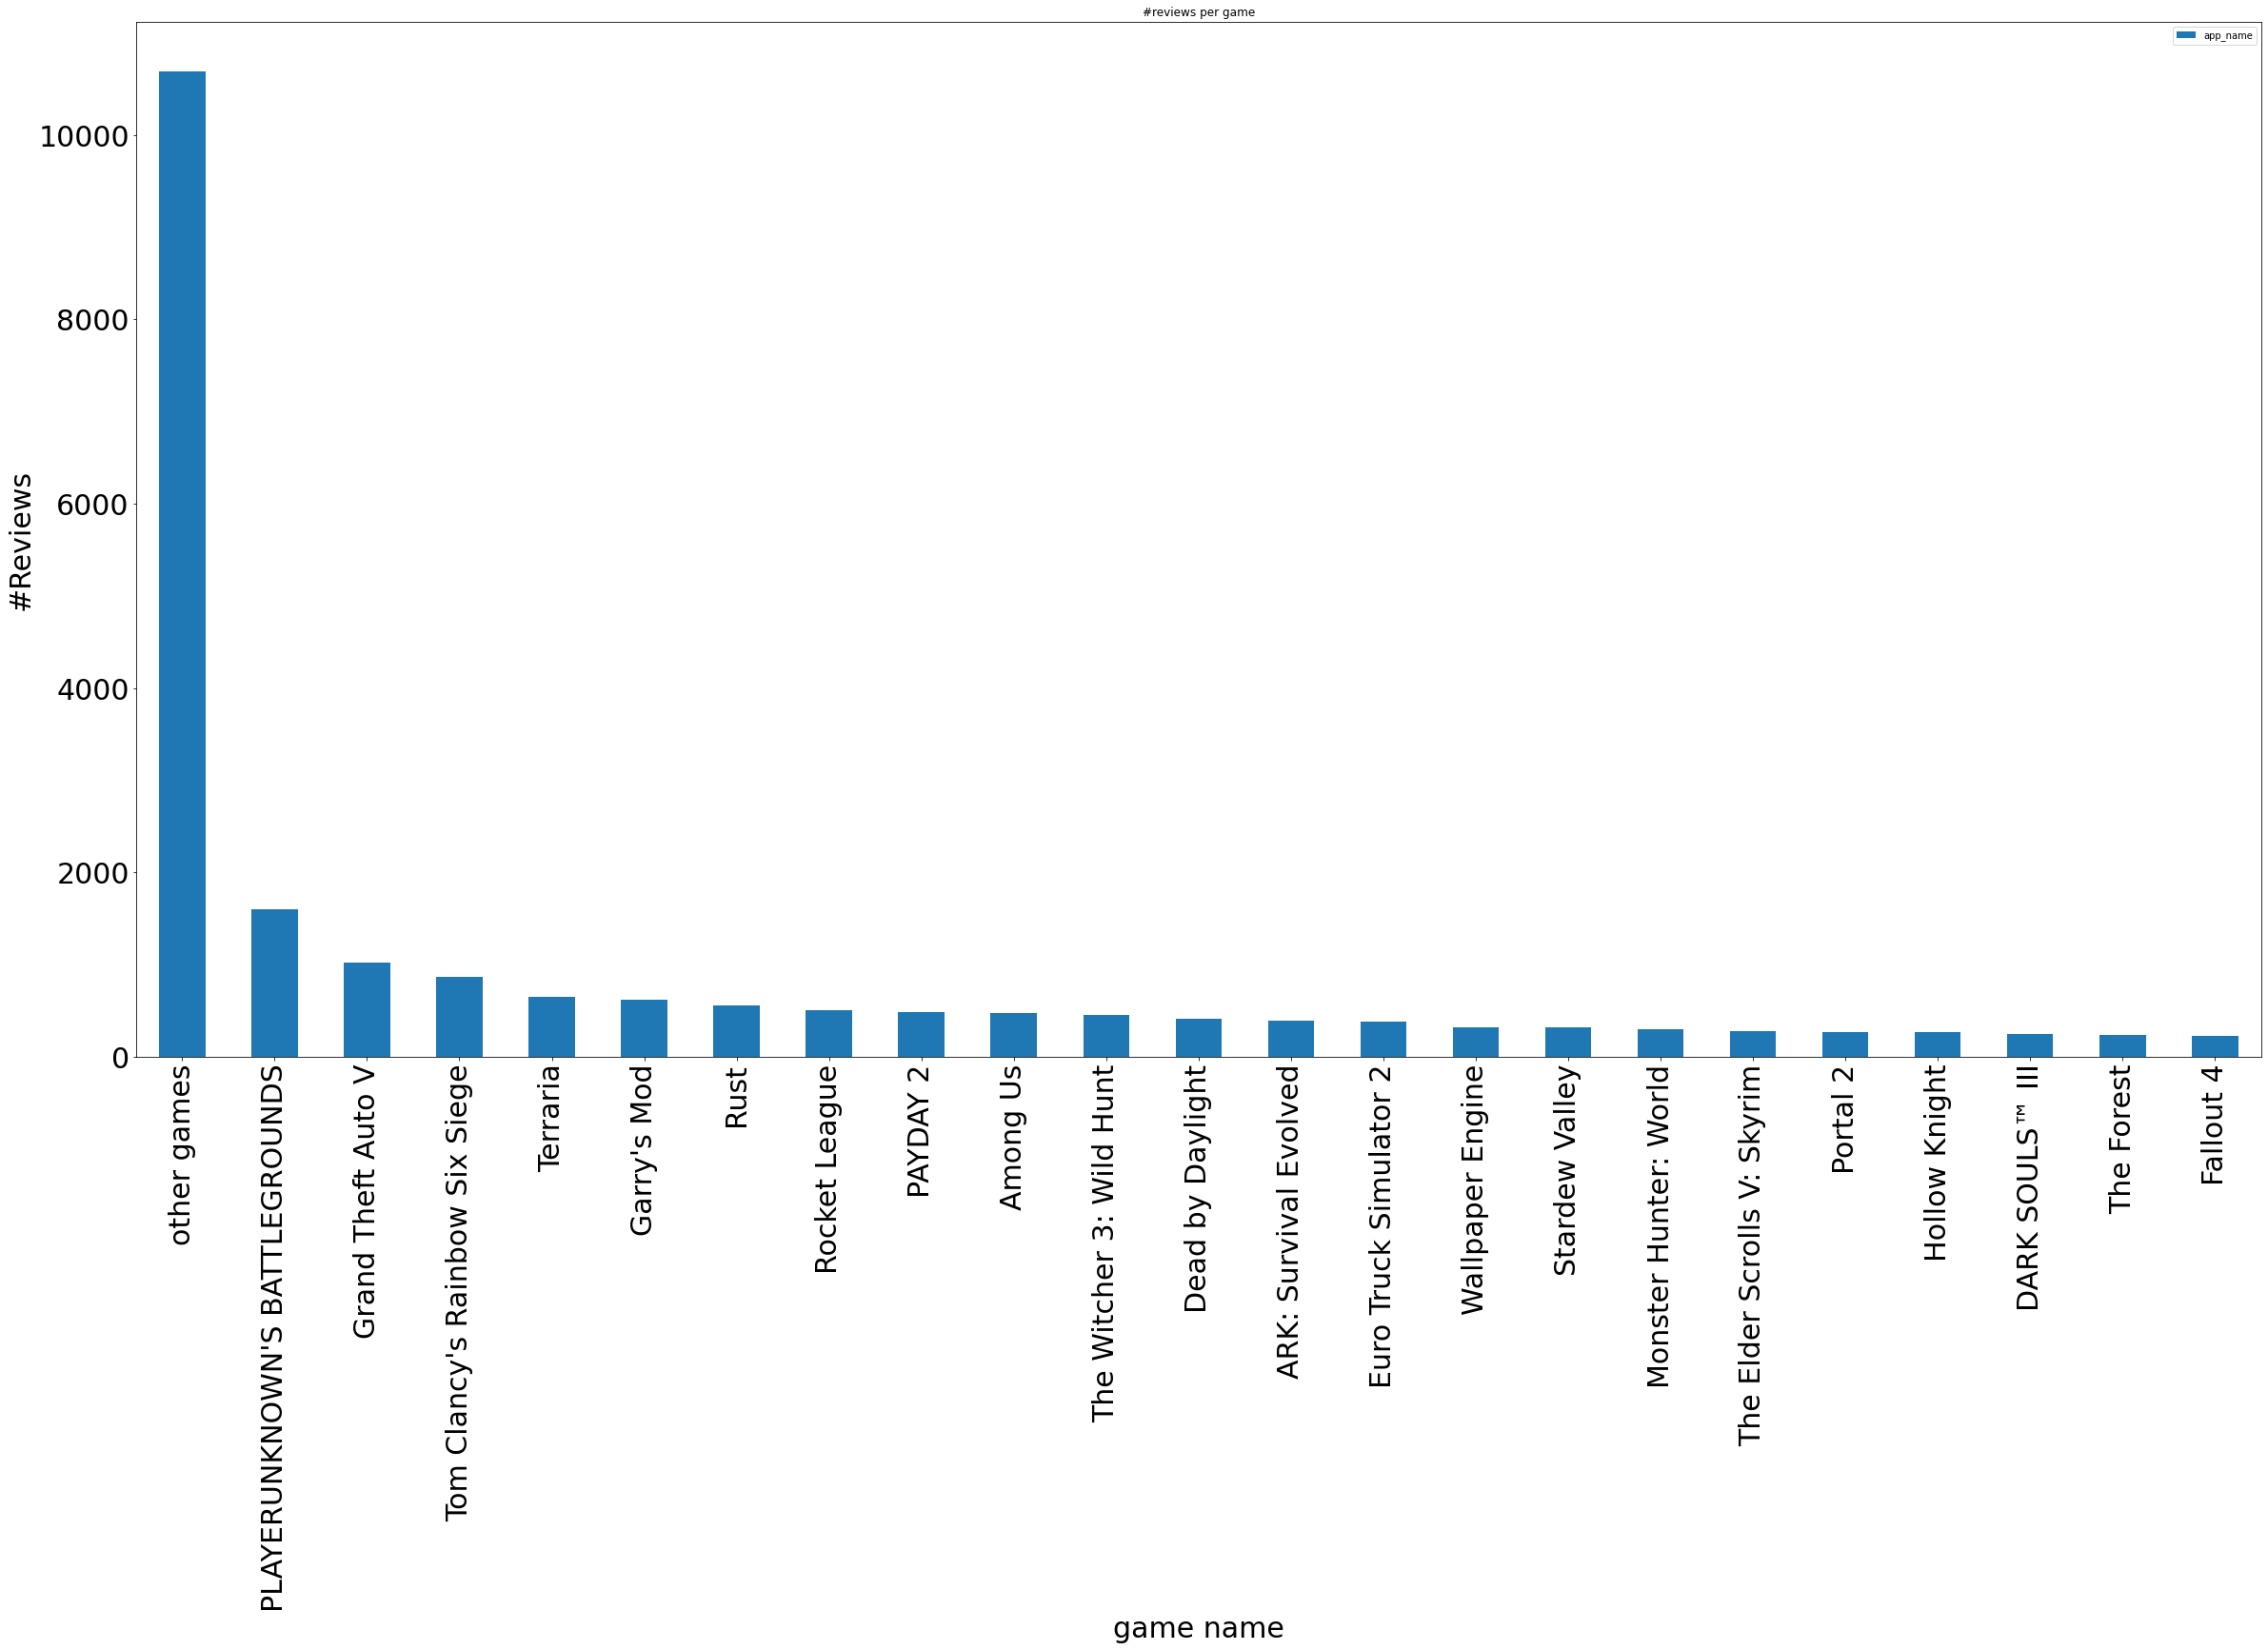

In [16]:
#The only way to read the names is by saving the image and then zooming in
ax=s.plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=30)
ax.set_xlabel("game name", fontsize=30)
ax.set_ylabel("#Reviews", fontsize=30)
plt.show()

### What applications have the best Weighted Vote Score?

In [17]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [18]:
#Here we just pick the 10 games with the highest absolute score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
359,The Witcher 3: Wild Hunt,0.971771
18729,Terraria,0.967955
17091,Fallout 4,0.955873
5513,Crusader Kings III,0.952451
12614,The Binding of Isaac,0.935987
9554,Undertale,0.935633
9518,Undertale,0.934792
17459,DARK SOULS™ III,0.933672
20658,Devil May Cry HD Collection,0.932902
5604,Stardew Valley,0.932126


In [19]:
#MEAN METHOD 
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Urban Empire,0.590420
The End Is Nigh,0.571254
Pogostuck: Rage With Your Friends,0.547608
WWE 2K19,0.546325
Due Process,0.543651
Slipstream,0.526882
Battle Royale Trainer,0.524129
Iconoclasts,0.523810
Identity,0.510823


### Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [20]:
#the 2 questions are done together
rec=df.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [21]:
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,4,4,0
A Hat in Time,39,27,2
A Short Hike,3,3,0
A Way Out,7,3,1
ARK: Survival Evolved,315,313,11
...,...,...,...
XCOM 2,39,31,1
Yakuza 0,18,15,2
Youtubers Life,11,11,2


<AxesSubplot:xlabel='app_name'>

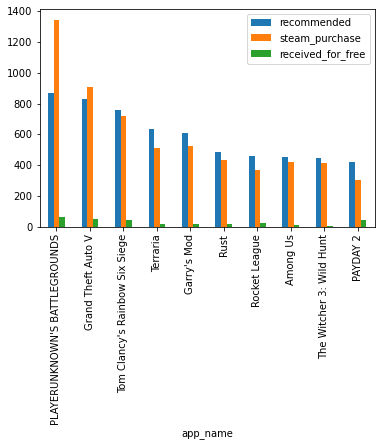

In [22]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

<AxesSubplot:xlabel='app_name'>

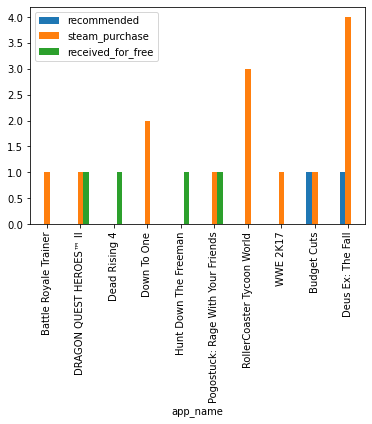

In [23]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')

# TQ1

Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  l = len(L)
  if k == l:
    return s
  else if k < l:
    return alg(L, k)
  else:
    return alg(R, k - l)


1.What does the algorithm compute?\
2.What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?\
3.What is asymptotically the running time of the algorithm in the best case?\


1.
The algorithm we are given computes
```{math}
alg(A, k) =s such that #{A_i \leq s} = k
```
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
```{math}
Q(p) = s such that P(X \leq s) = p
```
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

2.
The running time of the algorithm in the worst case scenario is $O(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $O(n)$ (not considering constants).

3.
The running time of the algorithm in the best case scenario is $O(1)$: we will be picking the right $s$ right away (at the first try).